# Problem definition

Earthquakes are killing countless people. I was especially moved when we lost lots of loved ones in the 2023 Turkey earthquake. Including our beloved Aliye Varoglu. Therefore, I would like to dedicate this study to her.

I wonder if we could forecast earthquakes based on astrology.

If we are able to foresee earthquakes, we can save countless lives.

<hr>

# Data

We need two data sources: Earthquake statistics and astrology values on earthquake days.

Initial structured earthquake data is available on https://data.humdata.org/dataset/catalog-of-earthquakes1970-2014 .

Astrology values can be calculated in a Python library called Kerykeion: https://pypi.org/project/kerykeion/ .

## Load earthquake CSV

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df_eq = pd.read_csv("earthquakes1970-2014.csv")
df_eq.head()

,DateTime,Latitude,Longitude,Depth,Magnitude,MagType,NbStations,Gap,Distance,RMS,Source,EventID
0,1970/01/04 17:00:40.20,24.139,102.503,31.0,7.5,Ms,90.0,NaN,NaN,0.0,NEI,1.970010e+09
1,1970/01/06 05:35:51.80,-9.628,151.458,8.0,6.2,Ms,85.0,NaN,NaN,0.0,NEI,1.970011e+09
2,1970/01/08 17:12:39.10,-34.741,178.568,179.0,6.1,Mb,59.0,NaN,NaN,0.0,NEI,1.970011e+09
3,1970/01/10 12:07:08.60,6.825,126.737,73.0,6.1,Mb,91.0,NaN,NaN,0.0,NEI,1.970011e+09
4,1970/01/16 08:05:39.00,60.280,-152.660,85.0,6.0,ML,0.0,NaN,NaN,NaN,AK,NaN


In [31]:
df_eq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5304 entries, 0 to 5303
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DateTime    5304 non-null   object 
 1   Latitude    5304 non-null   float64
 2   Longitude   5304 non-null   float64
 3   Depth       5304 non-null   float64
 4   Magnitude   5304 non-null   float64
 5   MagType     5304 non-null   object 
 6   NbStations  5250 non-null   float64
 7   Gap         172 non-null    float64
 8   Distance    170 non-null    float64
 9   RMS         5264 non-null   float64
 10  Source      5304 non-null   object 
 11  EventID     5242 non-null   float64
dtypes: float64(9), object(3)
memory usage: 497.4+ KB


In [32]:
df_eq.isna().sum()

DateTime         0
Latitude         0
Longitude        0
Depth            0
Magnitude        0
MagType          0
NbStations      54
Gap           5132
Distance      5134
RMS             40
Source           0
EventID         62
dtype: int64

## Drop unnecessary columns

In [33]:
df_eq.drop(columns=["NbStations", 
                    "Gap", 
                    "Distance",
                    "RMS",
                    "EventID",
                    "Depth",
                    "MagType",
                    "Source"],
          inplace=True)

In [34]:
df_eq.head()

,DateTime,Latitude,Longitude,Magnitude
0,1970/01/04 17:00:40.20,24.139,102.503,7.5
1,1970/01/06 05:35:51.80,-9.628,151.458,6.2
2,1970/01/08 17:12:39.10,-34.741,178.568,6.1
3,1970/01/10 12:07:08.60,6.825,126.737,6.1
4,1970/01/16 08:05:39.00,60.280,-152.660,6.0


## Split date / time

In [35]:
df_eq2 = df_eq.copy()
df_eq2["Year"] = df_eq2["DateTime"].str[:4].astype(int)
df_eq2["Month"] = df_eq2["DateTime"].str[5:7].astype(int)
df_eq2["Day"] = df_eq2["DateTime"].str[8:10].astype(int)
df_eq2["Hour"] = df_eq2["DateTime"].str[11:13].astype(int)
df_eq2["Minute"] = df_eq2["DateTime"].str[14:16].astype(int)
df_eq2.drop(columns=["DateTime"], inplace=True)
df_eq2.head()

,Latitude,Longitude,Magnitude,Year,Month,Day,Hour,Minute
0,24.139,102.503,7.5,1970,1,4,17,0
1,-9.628,151.458,6.2,1970,1,6,5,35
2,-34.741,178.568,6.1,1970,1,8,17,12
3,6.825,126.737,6.1,1970,1,10,12,7
4,60.280,-152.660,6.0,1970,1,16,8,5


## Add a column indicating a significant earthquake

In [36]:
df_eq2["BigEarthquake"] = 1
df_eq2.head()

,Latitude,Longitude,Magnitude,Year,Month,Day,Hour,Minute,BigEarthquake
0,24.139,102.503,7.5,1970,1,4,17,0,1
1,-9.628,151.458,6.2,1970,1,6,5,35,1
2,-34.741,178.568,6.1,1970,1,8,17,12,1
3,6.825,126.737,6.1,1970,1,10,12,7,1
4,60.280,-152.660,6.0,1970,1,16,8,5,1


## Delete insignificant earthquakes from the list

In [37]:
a1 = len(df_eq2[df_eq2["Magnitude"] >= 1])
a2 = len(df_eq2[df_eq2["Magnitude"] >= 2])
a3 = len(df_eq2[df_eq2["Magnitude"] >= 3])
a4 = len(df_eq2[df_eq2["Magnitude"] >= 4])
a5 = len(df_eq2[df_eq2["Magnitude"] >= 5])
a6 = len(df_eq2[df_eq2["Magnitude"] >= 6])
a7 = len(df_eq2[df_eq2["Magnitude"] >= 7])
print(a1, a2, a3, a4, a5, a6, a7)

5304 5304 5304 5304 5304 5304 533


All seem to be big, not much to do here

## 💾 Save current cleansed dataset

In [38]:
df_eq2.to_csv("earthquakes1970-2014-2.csv", index=False)

## Fill dataset with random entries where an earthquake did not happen

Main generation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df_eq2 = pd.read_csv("earthquakes1970-2014-2.csv")
df_eq2.head()

,Latitude,Longitude,Magnitude,Year,Month,Day,Hour,Minute,BigEarthquake
0,24.139,102.503,7.5,1970,1,4,17,0,1
1,-9.628,151.458,6.2,1970,1,6,5,35,1
2,-34.741,178.568,6.1,1970,1,8,17,12,1
3,6.825,126.737,6.1,1970,1,10,12,7,1
4,60.280,-152.660,6.0,1970,1,16,8,5,1


In [2]:
min_lat = df_eq2["Latitude"].min()
max_lat = df_eq2["Latitude"].max()
min_lon = df_eq2["Longitude"].min()
max_lon = df_eq2["Longitude"].max()
min_year = df_eq2["Year"].min()
max_year = df_eq2["Year"].max()

min_lat, max_lat, min_lon, max_lon, min_year, max_year

(-66.44799999999991, 84.94799999999991, -179.989, 179.997999999999, 1970, 2014)

In [3]:
len(df_eq2)

5304

In [4]:
import random
import calendar

def get_random_day(year, month):
  days_in_month = calendar.monthrange(year, month)[1]
  random_day = random.randint(1, days_in_month)
  return random_day

In [5]:
def does_df_have_entry_on_day(year, month, day):
    rows = df_eq2.query(f"Year=={year} and Month=={month} and Day=={day}")
    return len(rows) > 0

def does_df_have_entry_on_time(year, month, day, hour, minute):
    rows = df_eq2.query(f"Year=={year} and Month=={month} and Day=={day} and Hour=={hour} and Minute=={minute}")
    return len(rows) > 0

In [6]:
import random

new_df = df_eq2.copy()
target_entry_count = len(df_eq2) * 3
while len(new_df) < target_entry_count:
    random_year = random.randint(min_year, max_year)
    random_month = random.randint(1, 12)
    random_day = get_random_day(random_year, random_month)
    random_hour = random.randint(0, 23)
    random_minute = random.randint(0, 59)
    
    #if does_df_have_entry_on_time(random_year, random_month, random_day, random_hour, random_minute):
    #    continue
    
    random_lat = random.uniform(min_lat, max_lat)
    random_lon = random.uniform(min_lon, max_lon)
    
    new_entry = {
        "Latitude": random_lat,
        "Longitude": random_lon,
        "Magnitude": 0,
        "Year": random_year,
        "Month": random_month,
        "Day": random_day,
        "Hour": random_hour,
        "Minute": random_minute,
        "BigEarthquake": 0
    }
    
    new_df = pd.concat([pd.DataFrame(new_entry, index=[0]),new_df.loc[:]]).reset_index(drop=True)

In [7]:
new_df.head()

,Latitude,Longitude,Magnitude,Year,Month,Day,Hour,Minute,BigEarthquake
0,-24.619026,-101.684668,0.0,1993,9,25,0,38,0
1,-54.910874,31.752222,0.0,1987,6,20,6,36,0
2,-48.100859,-105.952612,0.0,1974,10,16,19,5,0
3,30.654011,174.252462,0.0,2007,4,29,9,5,0
4,68.564990,36.726384,0.0,2005,2,7,4,43,0


Remove non-earthquake data from days where a major earthquake happened

In [8]:
tmp = new_df.copy()

for index, row in df_eq2.iterrows():
    tmp = tmp.drop(tmp[(tmp["Year"] == row["Year"]) &
                       (tmp["Month"] == row["Month"]) &
                       (tmp["Day"] == row["Day"]) &
                       (tmp["BigEarthquake"] == 0)
                      ].index)
    
len(new_df), len(tmp)

(15912, 13215)

## 💾 Save dataset with random entries

In [9]:
tmp.to_csv("earthquakes1970-2014-2b.csv", index=False)

## Using Kerykeion, add astrological values to the dataset

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df_eq2 = pd.read_csv("earthquakes1970-2014-2b.csv")
df_eq2.head()

,Latitude,Longitude,Magnitude,Year,Month,Day,Hour,Minute,BigEarthquake
0,-24.619026,-101.684668,0.0,1993,9,25,0,38,0
1,-54.910874,31.752222,0.0,1987,6,20,6,36,0
2,-39.390242,-34.452493,0.0,1970,2,13,6,2,0
3,-3.870833,20.015722,0.0,1990,5,4,23,18,0
4,44.105271,14.894325,0.0,2014,7,4,2,56,0


In [12]:
from kerykeion import KrInstance

df_eq3 = df_eq2.copy()

new_cols = {}

for row in df_eq3.iterrows():
    entry = row[1]
    try:
        astro = KrInstance("dummy", 
                           int(entry.Year), 
                           int(entry.Month), 
                           int(entry.Day), 
                           int(entry.Hour), 
                           int(entry.Minute), 
                           lng=entry.Longitude, 
                           lat=entry.Latitude,
                           city="dummy",
                           nation="dummy")
    except Exception:
        assert entry.BigEarthquake == 0
        hour = entry.Hour + 3
        astro = KrInstance("dummy", 
                           int(entry.Year), 
                           int(entry.Month), 
                           int(entry.Day), 
                           int(hour), 
                           int(entry.Minute), 
                           lng=entry.Longitude, 
                           lat=entry.Latitude,
                           city="dummy",
                           nation="dummy")
    
    for planet in astro.planets_list:
        for key, val in planet:
            if key == "name":
                planet_name = val
                continue
            col_name = f"{planet_name} {key}"
            if col_name not in new_cols:
                new_cols[col_name] = []
            new_cols[col_name].append(val)
    
    for house in astro.houses_list:
        for key, val in house:
            if key == "name":
                house_name = val
                continue
            col_name = f"{house_name} {key}"
            if col_name not in new_cols:
                new_cols[col_name] = []
            new_cols[col_name].append(val)
    
for key in new_cols:
    df_eq3[key] = new_cols[key]
    
df_eq3.head()

/var/folders/dj/5n2bjn9d4ll_s915t85z__jw0000gn/T/ipykernel_13178/1353048281.py:55: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_eq3[key] = new_cols[key]
/var/folders/dj/5n2bjn9d4ll_s915t85z__jw0000gn/T/ipykernel_13178/1353048281.py:55: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_eq3[key] = new_cols[key]
/var/folders/dj/5n2bjn9d4ll_s915t85z__jw0000gn/T/ipykernel_13178/1353048281.py:55: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

,Latitude,Longitude,Magnitude,Year,Month,Day,Hour,Minute,BigEarthquake,Sun quality,...,Twelfth House quality,Twelfth House element,Twelfth House sign,Twelfth House sign_num,Twelfth House position,Twelfth House abs_pos,Twelfth House emoji,Twelfth House point_type,Twelfth House house,Twelfth House retrograde
0,-24.619026,-101.684668,0.0,1993,9,25,0,38,0,Cardinal,...,Mutable,Air,Gem,2,16.476433,76.476433,♊️,House,None,None
1,-54.910874,31.752222,0.0,1987,6,20,6,36,0,Mutable,...,Mutable,Air,Gem,2,9.817203,69.817203,♊️,House,None,None
2,-39.390242,-34.452493,0.0,1970,2,13,6,2,0,Fixed,...,Cardinal,Earth,Cap,9,4.982397,274.982397,♑️,House,None,None
3,-3.870833,20.015722,0.0,1990,5,4,23,18,0,Fixed,...,Mutable,Fire,Sag,8,3.370698,243.370698,♐️,House,None,None
4,44.105271,14.894325,0.0,2014,7,4,2,56,0,Cardinal,...,Cardinal,Fire,Ari,0,16.691840,16.691840,♈️,House,None,None


## 💾 Save dataset

In [13]:
df_eq3.to_csv("earthquakes1970-2014-3b.csv", index=False)

## 💾 Drop useless columns and save dataset

In [14]:
df_eq4 = pd.read_csv("earthquakes1970-2014-3b.csv")
df_eq4 = df_eq4[df_eq4.columns.drop(list(df_eq4.filter(regex='House house')))] # Null
df_eq4 = df_eq4[df_eq4.columns.drop(list(df_eq4.filter(regex='House retrograde')))] # Null
df_eq4 = df_eq4[df_eq4.columns.drop(list(df_eq4.filter(regex='emoji')))] # Useless
df_eq4.to_csv("earthquakes1970-2014-4b.csv", index=False)

<hr>

# Evaluation

My initial goal is to surpass an initial accuracy of 50%. If we can guess the earthquake possibility on a given location & day over 50%, this would definitely be a project worth chasing. Any lower value could still be significant, as scientists today don't have a concrete way of predicting earthquakes at all. 

I will obviously run the model on training / test datasets, but will also try to predict future / upcoming earthquakes.

If I get good results; it makes sense to let the world know as soon as possible, as it can save lives. But I also need concrete predictions so that the world believes my success. Ethical dilemma - but I don't know what else to do in such a noisy world to make my success heard.

<hr>

# Features

## Convert features to numbers as needed

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("earthquakes1970-2014-4b.csv")

In [16]:
pd.options.display.max_rows = 4000
df.dtypes

Latitude                     float64
Longitude                    float64
Magnitude                    float64
Year                           int64
Month                          int64
Day                            int64
Hour                           int64
Minute                         int64
BigEarthquake                  int64
Sun quality                   object
Sun element                   object
Sun sign                      object
Sun sign_num                   int64
Sun position                 float64
Sun abs_pos                  float64
Sun point_type                object
Sun house                     object
Sun retrograde                  bool
Moon quality                  object
Moon element                  object
Moon sign                     object
Moon sign_num                  int64
Moon position                float64
Moon abs_pos                 float64
Moon point_type               object
Moon house                    object
Moon retrograde                 bool
M

In [17]:
def preprocess_data(dfx):
    df = dfx.copy()
    
    for label, content in df.items():
        if pd.api.types.is_string_dtype(content):
            df[label] = content.astype("category").cat.as_ordered()
        if pd.api.types.is_bool_dtype(content):
            df[label] = (df[label] == True).astype(int)
            
    return df

In [18]:
tmp = preprocess_data(df)
tmp.dtypes

Latitude                      float64
Longitude                     float64
Magnitude                     float64
Year                            int64
Month                           int64
Day                             int64
Hour                            int64
Minute                          int64
BigEarthquake                   int64
Sun quality                  category
Sun element                  category
Sun sign                     category
Sun sign_num                    int64
Sun position                  float64
Sun abs_pos                   float64
Sun point_type               category
Sun house                    category
Sun retrograde                  int64
Moon quality                 category
Moon element                 category
Moon sign                    category
Moon sign_num                   int64
Moon position                 float64
Moon abs_pos                  float64
Moon point_type              category
Moon house                   category
Moon retrogr

In [19]:
tmp.head().T

,0,1,2,3,4
Latitude,-24.619026,-54.910874,-39.390242,-3.870833,44.105271
Longitude,-101.684668,31.752222,-34.452493,20.015722,14.894325
Magnitude,0.0,0.0,0.0,0.0,0.0
Year,1993,1987,1970,1990,2014
Month,9,6,2,5,7
Day,25,20,13,4,4
Hour,0,6,6,23,2
Minute,38,36,2,18,56
BigEarthquake,0,0,0,0,0
Sun quality,Cardinal,Mutable,Fixed,Fixed,Cardinal


In [20]:
tmp.to_csv("earthquakes1970-2014-5.csv", index=False)

## Inspect if anything else is needed

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("earthquakes1970-2014-5.csv")

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13215 entries, 0 to 13214
Columns: 201 entries, Latitude to Twelfth House point_type
dtypes: float64(51), int64(42), object(108)
memory usage: 20.3+ MB


In [23]:
df.dtypes

Latitude                     float64
Longitude                    float64
Magnitude                    float64
Year                           int64
Month                          int64
Day                            int64
Hour                           int64
Minute                         int64
BigEarthquake                  int64
Sun quality                   object
Sun element                   object
Sun sign                      object
Sun sign_num                   int64
Sun position                 float64
Sun abs_pos                  float64
Sun point_type                object
Sun house                     object
Sun retrograde                 int64
Moon quality                  object
Moon element                  object
Moon sign                     object
Moon sign_num                  int64
Moon position                float64
Moon abs_pos                 float64
Moon point_type               object
Moon house                    object
Moon retrograde                int64
M

In [12]:
df.isna().sum()

Latitude                     0
Longitude                    0
Magnitude                    0
Year                         0
Month                        0
Day                          0
Hour                         0
Minute                       0
BigEarthquake                0
Sun quality                  0
Sun element                  0
Sun sign                     0
Sun sign_num                 0
Sun position                 0
Sun abs_pos                  0
Sun point_type               0
Sun house                    0
Sun retrograde               0
Moon quality                 0
Moon element                 0
Moon sign                    0
Moon sign_num                0
Moon position                0
Moon abs_pos                 0
Moon point_type              0
Moon house                   0
Moon retrograde              0
Mercury quality              0
Mercury element              0
Mercury sign                 0
Mercury sign_num             0
Mercury position             0
Mercury 

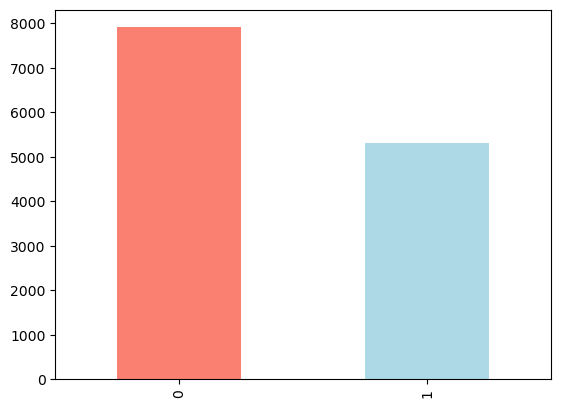

In [24]:
df["BigEarthquake"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Latitude,13215.0,6.475190,38.574085,-66.448000,-21.892500,1.889000,38.316131,84.948000
Longitude,13215.0,18.556183,114.813319,-179.989000,-81.421731,31.752222,127.758985,179.998000
Magnitude,13215.0,2.556321,3.133358,0.000000,0.000000,0.000000,6.100000,9.100000
Year,13215.0,1992.661597,13.069642,1970.000000,1981.000000,1994.000000,2004.000000,2014.000000
Month,13215.0,6.496406,3.449473,1.000000,4.000000,7.000000,9.000000,12.000000
Day,13215.0,15.869240,8.755461,1.000000,8.000000,16.000000,23.000000,31.000000
Hour,13215.0,11.513507,6.934412,0.000000,6.000000,11.000000,18.000000,23.000000
Minute,13215.0,29.267348,17.383412,0.000000,14.000000,29.000000,44.000000,59.000000
BigEarthquake,13215.0,0.401362,0.490193,0.000000,0.000000,0.000000,1.000000,1.000000
Sun sign_num,13215.0,5.452213,3.457646,0.000000,2.000000,5.000000,8.000000,11.000000


In [26]:
df_eq = df[df["BigEarthquake"]==1]
df_eq.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5304 entries, 7911 to 13214
Columns: 201 entries, Latitude to Twelfth House point_type
dtypes: float64(51), int64(42), object(108)
memory usage: 8.2+ MB


<Axes: xlabel='Year'>

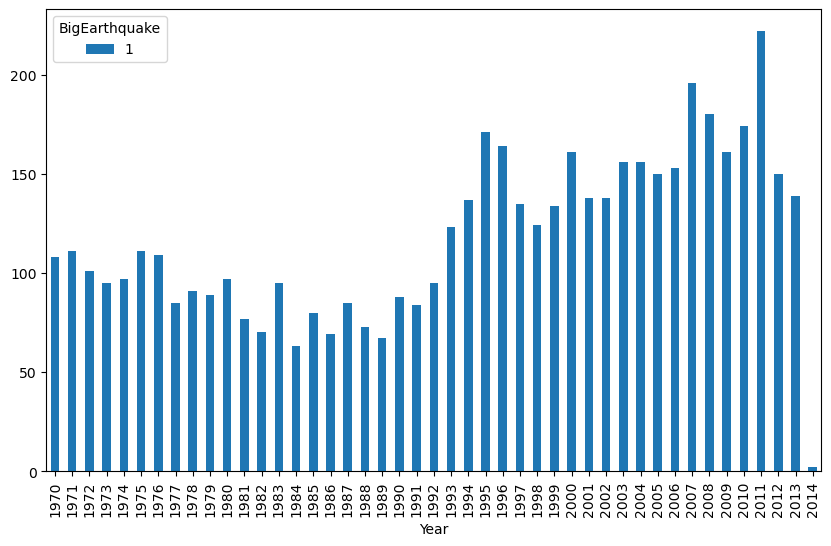

In [27]:
pd.crosstab(df_eq.Year, df_eq.BigEarthquake).plot(kind="bar", figsize=(10,6))

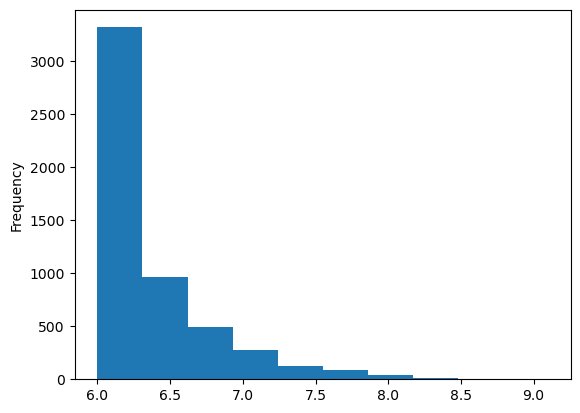

In [28]:
df_eq.Magnitude.plot.hist();

In [29]:
pd.options.display.max_rows = 4000
df_eq.corr()

/var/folders/dj/5n2bjn9d4ll_s915t85z__jw0000gn/T/ipykernel_13178/2111517492.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_eq.corr()


,Latitude,Longitude,Magnitude,Year,Month,Day,Hour,Minute,BigEarthquake,Sun sign_num,...,Ninth House abs_pos,Tenth House sign_num,Tenth House position,Tenth House abs_pos,Eleventh House sign_num,Eleventh House position,Eleventh House abs_pos,Twelfth House sign_num,Twelfth House position,Twelfth House abs_pos
Latitude,1.000000,0.155608,0.035831,-0.023785,0.002302,-0.006071,-0.001805,0.006500,NaN,-0.024186,...,0.022200,0.033824,0.017217,0.035156,0.033786,0.013363,0.034892,0.032854,-0.013468,0.031530
Longitude,0.155608,1.000000,0.036141,0.013880,0.006492,-0.001776,0.009836,-0.000069,NaN,0.018180,...,-0.001511,0.005580,-0.012926,0.004468,0.002063,-0.005791,0.001553,-0.005957,-0.005093,-0.006422
Magnitude,0.035831,0.036141,1.000000,0.016172,0.014471,0.003612,0.000799,-0.009211,NaN,-0.007161,...,0.007387,0.021863,0.002945,0.022033,0.010168,0.005019,0.010588,0.009100,-0.007641,0.008367
Year,-0.023785,0.013880,0.016172,1.000000,-0.018596,-0.037095,0.001396,-0.002124,NaN,0.029407,...,0.016962,0.013302,-0.023066,0.011306,0.002714,-0.001381,0.002588,0.007776,-0.006324,0.007169
Month,0.002302,0.006492,0.014471,-0.018596,1.000000,0.034640,-0.007737,0.012246,NaN,-0.028101,...,-0.003861,0.006313,0.000994,0.006374,-0.001419,-0.015383,-0.002762,-0.019264,-0.020297,-0.021123
Day,-0.006071,-0.001776,0.003612,-0.037095,0.034640,1.000000,0.008976,-0.018514,NaN,-0.019514,...,-0.023955,-0.022364,-0.027232,-0.024583,-0.004258,0.010228,-0.003356,-0.007077,0.020842,-0.005114
Hour,-0.001805,0.009836,0.000799,0.001396,-0.007737,0.008976,1.000000,-0.015695,NaN,-0.003952,...,-0.044086,-0.027733,0.017450,-0.026159,-0.033905,0.035859,-0.030705,-0.007589,0.010677,-0.006575
Minute,0.006500,-0.000069,-0.009211,-0.002124,0.012246,-0.018514,-0.015695,1.000000,NaN,0.012012,...,-0.032627,-0.019558,-0.021736,-0.021323,0.002334,-0.020825,0.000508,0.002306,-0.001669,0.002145
BigEarthquake,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sun sign_num,-0.024186,0.018180,-0.007161,0.029407,-0.028101,-0.019514,-0.003952,0.012012,NaN,1.000000,...,0.002048,0.014690,0.007216,0.015246,0.011047,0.005674,0.011522,0.005445,0.014141,0.006756


No single feature seems to be correlated to magnitude, latitude or longitude.

In [30]:
df.corr()

/var/folders/dj/5n2bjn9d4ll_s915t85z__jw0000gn/T/ipykernel_13178/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Latitude,Longitude,Magnitude,Year,Month,Day,Hour,Minute,BigEarthquake,Sun sign_num,...,Ninth House abs_pos,Tenth House sign_num,Tenth House position,Tenth House abs_pos,Eleventh House sign_num,Eleventh House position,Eleventh House abs_pos,Twelfth House sign_num,Twelfth House position,Twelfth House abs_pos
Latitude,1.000000,0.032114,-0.080681,-0.010743,0.015004,-0.006444,0.002838,-0.010492,-0.082467,-0.010558,...,-0.001117,0.013247,0.011604,0.014171,0.004571,0.004302,0.004937,0.011189,-0.005909,0.010616
Longitude,0.032114,1.000000,0.187477,0.025034,0.003901,-0.002328,0.007315,0.003443,0.186038,0.002385,...,0.005915,0.009915,-0.002753,0.009644,0.003079,-0.001740,0.002919,0.007936,-0.008713,0.007108
Magnitude,-0.080681,0.187477,1.000000,0.118990,0.015272,-0.023148,-0.001591,-0.000485,0.996405,0.006889,...,0.015647,0.003732,-0.000489,0.003675,0.003730,-0.010663,0.002784,0.010963,-0.014401,0.009598
Year,-0.010743,0.025034,0.118990,1.000000,-0.010456,-0.016138,0.003213,-0.005059,0.118559,0.012261,...,0.009662,0.006678,-0.004203,0.006298,0.001904,-0.001860,0.001736,-0.000537,-0.013466,-0.001794
Month,0.015004,0.003901,0.015272,-0.010456,1.000000,0.012060,0.001703,-0.001942,0.014548,-0.030618,...,0.006238,0.003707,-0.000705,0.003633,0.001267,-0.003635,0.000944,-0.027048,-0.008092,-0.027754
Day,-0.006444,-0.002328,-0.023148,-0.016138,0.012060,1.000000,0.006590,-0.002281,-0.023424,-0.025029,...,-0.002939,-0.009229,-0.016220,-0.010558,-0.010568,0.004741,-0.010126,-0.019957,0.011775,-0.018821
Hour,0.002838,0.007315,-0.001591,0.003213,0.001703,0.006590,1.000000,-0.000715,-0.001640,-0.007852,...,-0.066845,-0.042321,0.007218,-0.041544,-0.027738,0.013387,-0.026494,-0.006479,0.000683,-0.006404
Minute,-0.010492,0.003443,-0.000485,-0.005059,-0.001942,-0.002281,-0.000715,1.000000,0.000009,-0.008819,...,-0.000439,0.000259,-0.009499,-0.000542,0.000273,-0.014243,-0.000979,-0.003810,0.001051,-0.003705
BigEarthquake,-0.082467,0.186038,0.996405,0.118559,0.014548,-0.023424,-0.001640,0.000009,1.000000,0.007298,...,0.015307,0.002567,-0.000650,0.002502,0.003195,-0.010971,0.002223,0.010511,-0.014040,0.009180
Sun sign_num,-0.010558,0.002385,0.006889,0.012261,-0.030618,-0.025029,-0.007852,-0.008819,0.007298,1.000000,...,-0.011968,0.003213,0.009694,0.004016,0.009270,0.012580,0.010353,0.010932,0.008442,0.011701


No single feature seems to be correlated to big earthquake either.

<hr>

# Modelling with all features

## Load latest data and transform for modelling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("earthquakes1970-2014-5.csv")

In [2]:
from sklearn import preprocessing

def preprocess_data(dfx):
    df = dfx.copy()
    le = preprocessing.LabelEncoder()
    
    for label, content in df.items():
            if pd.api.types.is_string_dtype(content):
                le.fit(content)
                content2 = le.transform(content)
                df[label] = content2
            if pd.api.types.is_bool_dtype(content):
                df[label] = (df[label] == True).astype(int)
    
    return df

In [4]:
df = preprocess_data(df)

In [5]:
df.dtypes

Latitude                    float64
Longitude                   float64
Magnitude                   float64
Year                          int64
Month                         int64
                             ...   
Twelfth House sign            int64
Twelfth House sign_num        int64
Twelfth House position      float64
Twelfth House abs_pos       float64
Twelfth House point_type      int64
Length: 201, dtype: object

In [35]:
df.head().T

,0,1,2,3,4
Latitude,-24.619026,-54.910874,-39.390242,-3.870833,44.105271
Longitude,-101.684668,31.752222,-34.452493,20.015722,14.894325
Magnitude,0.000000,0.000000,0.000000,0.000000,0.000000
Year,1993.000000,1987.000000,1970.000000,1990.000000,2014.000000
Month,9.000000,6.000000,2.000000,5.000000,7.000000
Day,25.000000,20.000000,13.000000,4.000000,4.000000
Hour,0.000000,6.000000,6.000000,23.000000,2.000000
Minute,38.000000,36.000000,2.000000,18.000000,56.000000
BigEarthquake,0.000000,0.000000,0.000000,0.000000,0.000000
Sun quality,0.000000,2.000000,1.000000,1.000000,0.000000


In [36]:
df.to_csv("earthquakes1970-2014-6.csv", index=False)

## Train - test split

In [2]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("earthquakes1970-2014-6.csv")

df_eq = df[df["BigEarthquake"] == 1]
df_eq.sample()
X_eq = df_eq.drop("Magnitude", axis=1).drop("BigEarthquake", axis=1)
y_eq = df_eq["BigEarthquake"]

df_ne = df[df["BigEarthquake"] == 0]
df_ne.sample()
X_ne = df_ne.drop("Magnitude", axis=1).drop("BigEarthquake", axis=1)
y_ne = df_ne["BigEarthquake"]

len(X_eq), len(X_ne)

(5304, 7911)

In [7]:
# y_eq.head()

In [3]:
X_train = X_ne.copy()
y_train = y_ne.copy()
X_eq_train, X_eq_test, y_eq_train, y_eq_test = train_test_split(X_eq, y_eq, test_size=0.2)
X_train = pd.concat([X_train, X_eq_train], ignore_index=True)
y_train = pd.concat([y_train, y_eq_train], ignore_index=True)
X_test = X_eq_test.copy()
y_test = y_eq_test.copy()

In [15]:
# len(X_train), len(y_train), len(X_test), len(y_test)

In [16]:
# y_test.head()

In [17]:
# X_train.dtypes

In [18]:
# y_train.dtypes

In [19]:
# y_test.head()

In [20]:
# len(y_test[y_test == 1]) / len(y_test), len(y_test[y_test == 0]) / len(y_test)

In [21]:
# len(y_train[y_train == 1]) / len(y_train), len(y_train[y_train == 0]) / len(y_train)

In [22]:
# len(y_train[y_train == 1])

## Predict big earthquake

### SGD Classifier

In [39]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
clf.fit(X_train, y_train)

/Users/kerem/Documents/dev/kaggle/env/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(max_iter=5)

In [40]:
clf.score(X_test, y_test)

0.16399622997172478

### Kernel approximation

In [10]:
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import SGDClassifier

rbf_feature = RBFSampler(gamma=1, random_state=1)
X_train_features = rbf_feature.fit_transform(X_train)
clf = SGDClassifier(max_iter=5)
clf.fit(X_train_features, y_train)

/Users/kerem/Documents/dev/kaggle/env/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(max_iter=5)

In [11]:
X_test_features = rbf_feature.fit_transform(X_test)
clf.score(X_test_features, y_test)

0.001885014137606032

### Random forest

In [46]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [47]:
clf.score(X_test, y_test)

0.46277097078228085

### KNeighbors Classifier

In [48]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
clf.score(X_test, y_test)

Kernel dies, I don't know why.

### Linear SVC

In [4]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)

SVC()

In [5]:
clf.score(X_test, y_test)

0.0

### Logistic regression

In [6]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)

/Users/kerem/Documents/dev/kaggle/env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [7]:
clf.score(X_test, y_test)

0.2299717247879359

# Modelling with partial features

No good results, so far. Random forest seems to bring the "best" (!) result, so we will stick to it. I will try to cherry-pick features to be involved.

## astro.com features

https://www.astro.com/astrology/aa_article140925_e.htm says: Astrologers consider Pluto an essential influence in earthquakes, which cause a tremendous upheaval, as in this case. Uranus can be involved, because of its sudden, unexpected and drastic character. When Jupiter is involved, the effects of an earthquake will be of a large, massive nature, as we have seen here. And when Neptune is involved, the oceans can be so moved as to cause tsunamis. The planet Mars also has to be considered, as it causes shocks and breaks things up. It can also cause fires, as was the case in Lisbon.

So I will re-attempt to build a model using those planets.

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("earthquakes1970-2014-5.csv")

In [13]:
df = preprocess_data(df)

NameError: name 'preprocess_data' is not defined

In [4]:
pd.options.display.max_rows = 4000
df.dtypes

Latitude                     float64
Longitude                    float64
Magnitude                    float64
Year                           int64
Month                          int64
Day                            int64
Hour                           int64
Minute                         int64
BigEarthquake                  int64
Sun quality                    int64
Sun element                    int64
Sun sign                       int64
Sun sign_num                   int64
Sun position                 float64
Sun abs_pos                  float64
Sun point_type                 int64
Sun house                      int64
Sun retrograde                 int64
Moon quality                   int64
Moon element                   int64
Moon sign                      int64
Moon sign_num                  int64
Moon position                float64
Moon abs_pos                 float64
Moon point_type                int64
Moon house                     int64
Moon retrograde                int64
M

In [5]:
dfp = pd.DataFrame()

In [6]:
features = ["Latitude", 
            "Longitude",
            "Year",
            "Month",
            "Day",
            "Hour",
            "Minute",
            "BigEarthquake"]

planets = ["Pluto", "Uranus", "Jupiter", "Mars"]

In [10]:
dfp = pd.DataFrame()

for column in df.columns:
    if column in features:
        dfp[column] = df[column]
        continue
    for planet in planets:
        if planet in column:
            dfp[column] = df[column]
            continue
            
dfp.dtypes

Latitude              float64
Longitude             float64
Year                    int64
Month                   int64
Day                     int64
Hour                    int64
Minute                  int64
BigEarthquake           int64
Mars quality            int64
Mars element            int64
Mars sign               int64
Mars sign_num           int64
Mars position         float64
Mars abs_pos          float64
Mars point_type         int64
Mars house              int64
Mars retrograde         int64
Jupiter quality         int64
Jupiter element         int64
Jupiter sign            int64
Jupiter sign_num        int64
Jupiter position      float64
Jupiter abs_pos       float64
Jupiter point_type      int64
Jupiter house           int64
Jupiter retrograde      int64
Uranus quality          int64
Uranus element          int64
Uranus sign             int64
Uranus sign_num         int64
Uranus position       float64
Uranus abs_pos        float64
Uranus point_type       int64
Uranus hou

In [11]:
dfp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120518 entries, 0 to 120517
Data columns (total 44 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Latitude            120518 non-null  float64
 1   Longitude           120518 non-null  float64
 2   Year                120518 non-null  int64  
 3   Month               120518 non-null  int64  
 4   Day                 120518 non-null  int64  
 5   Hour                120518 non-null  int64  
 6   Minute              120518 non-null  int64  
 7   BigEarthquake       120518 non-null  int64  
 8   Mars quality        120518 non-null  int64  
 9   Mars element        120518 non-null  int64  
 10  Mars sign           120518 non-null  int64  
 11  Mars sign_num       120518 non-null  int64  
 12  Mars position       120518 non-null  float64
 13  Mars abs_pos        120518 non-null  float64
 14  Mars point_type     120518 non-null  int64  
 15  Mars house          120518 non-nul

In [13]:
df_eq = dfp[dfp["BigEarthquake"] == 1]
df_eq.sample()
X_eq = df_eq.drop("BigEarthquake", axis=1)
y_eq = df_eq["BigEarthquake"]

df_ne = dfp[dfp["BigEarthquake"] == 0]
df_ne.sample()
X_ne = df_ne.drop("BigEarthquake", axis=1)
y_ne = df_ne["BigEarthquake"]

len(X_eq), len(X_ne)

(5304, 115214)

In [15]:
from sklearn.model_selection import train_test_split

X_train = X_ne.copy()
y_train = y_ne.copy()
X_eq_train, X_eq_test, y_eq_train, y_eq_test = train_test_split(X_eq, y_eq, test_size=0.2)
X_train = pd.concat([X_train, X_eq_train], ignore_index=True)
y_train = pd.concat([y_train, y_eq_train], ignore_index=True)
X_test = X_eq_test.copy()
y_test = y_eq_test.copy()

In [16]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.11592836946277098

Better than before, but not high enough.

## shankerstudy.com features

https://www.shankerstudy.com/2010/05/earthquakes-astrological-princliples.html says:

At the time of earth-quakes, adverse connections between Mars and Saturn (conjunction, opposition, aspect etc.) have been noted.

Frequent happening of earthquakes is indicated when the planets like Uranus, Saturn, Mars, or Jupiter occupy Taurus and Scorpio.

For an earthquake to happen in the year, severe affliction of 8th house or its lord must be indicated (8th house denotes mass deaths and mass tragedies which do happen in earthquakes also).

Eclipses falling at quadrants to Jupiter, Saturn or Mars also produce earthquakes. The area of the occurrence is generally indicated by the zodiacal sign in which the above combination occur.

The Moon and Mercury have a significant role to play in causing earthquakes.

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("earthquakes1970-2014-5.csv")
df = preprocess_data(df)
dfp = pd.DataFrame()

In [18]:
from sklearn.ensemble import RandomForestClassifier

def run_theories(df, features, theories):
    theory_index = 0
    for theory in theories:
        theory_index += 1
        dfp = pd.DataFrame()

        for column in df.columns:
            if column in features:
                dfp[column] = df[column]
                continue
            for entry in theory:
                if entry in column:
                    dfp[column] = df[column]
                    continue

        df_eq = dfp[dfp["BigEarthquake"] == 1]
        df_eq.sample()
        X_eq = df_eq.drop("BigEarthquake", axis=1)
        y_eq = df_eq["BigEarthquake"]

        df_ne = dfp[dfp["BigEarthquake"] == 0]
        df_ne.sample()
        X_ne = df_ne.drop("BigEarthquake", axis=1)
        y_ne = df_ne["BigEarthquake"]

        X_train = X_ne.copy()
        y_train = y_ne.copy()
        X_eq_train, X_eq_test, y_eq_train, y_eq_test = train_test_split(X_eq, y_eq, test_size=0.2)
        X_train = pd.concat([X_train, X_eq_train], ignore_index=True)
        y_train = pd.concat([y_train, y_eq_train], ignore_index=True)
        X_test = X_eq_test.copy()
        y_test = y_eq_test.copy()
        
        print(f"Theory {theory_index} columns:{X_train.columns}")

        clf = RandomForestClassifier()
        clf.fit(X_train, y_train)
        print(f"Theory {theory_index} score:{clf.score(X_test, y_test)}")
        print("Feature importances:")
        fi_index = -1
        lat_imp = 0
        lon_imp = 0
        for fim in clf.feature_importances_:
            fi_index += 1
            if dfp.columns[fi_index] == "Latitude":
                lat_imp = fim
            elif dfp.columns[fi_index] == "Longitude":
                lon_imp = fim
            elif (lat_imp > 0 and fim >= lat_imp) or (lon_imp > 0 and fim >= lon_imp):
                print("!!!!!!!!!!")
            print(f"{dfp.columns[fi_index]}: {fim}")
        # print(clf.feature_importances_)

In [19]:
features = ["Latitude", 
            "Longitude",
            "BigEarthquake"]

theories = [["Mars", "Saturn"],
            ["Uranus", "Saturn", "Mars", "Jupiter"],
            ["Eighth House"],
            ["Saturn", "Mars", "Jupiter"],
            ["Moon", "Mercury"]]

run_theories(df, features, theories)

Theory 1 columns:Index(['Latitude', 'Longitude', 'Mars quality', 'Mars element', 'Mars sign',
       'Mars sign_num', 'Mars position', 'Mars abs_pos', 'Mars point_type',
       'Mars house', 'Mars retrograde', 'Saturn quality', 'Saturn element',
       'Saturn sign', 'Saturn sign_num', 'Saturn position', 'Saturn abs_pos',
       'Saturn point_type', 'Saturn house', 'Saturn retrograde'],
      dtype='object')
Theory 1 score:0.6691800188501413
Feature importances:
Latitude: 0.19044867040440225
Longitude: 0.27708177181999244
BigEarthquake: 0.010141583034686314
Mars quality: 0.013791259106634717
Mars element: 0.019071500463354846
Mars sign: 0.018726993078876753
Mars sign_num: 0.07796366700200424
Mars position: 0.0763663642944097
Mars abs_pos: 0.0
Mars point_type: 0.044092282560678965
Mars house: 0.0054633487150650825
Mars retrograde: 0.008783617795728305
Saturn quality: 0.010944663610804902
Saturn element: 0.01606924838164651
Saturn sign: 0.016830793076056425
Saturn sign_num: 0.07812410779

Eight House: %26. A little contribution from 8th hough sign_num and position, but not much.

Let's try Mars alone

In [20]:
features = ["Latitude", 
            "Longitude",
            "BigEarthquake"]

theories = [["Mars"], 
            ["Mars", "Eighth House"]]
run_theories(df, features, theories)

Theory 1 columns:Index(['Latitude', 'Longitude', 'Mars quality', 'Mars element', 'Mars sign',
       'Mars sign_num', 'Mars position', 'Mars abs_pos', 'Mars point_type',
       'Mars house', 'Mars retrograde'],
      dtype='object')
Theory 1 score:0.6880301602262017
Feature importances:
Latitude: 0.28004028645070017
Longitude: 0.3699921628791764
BigEarthquake: 0.006724137720750056
Mars quality: 0.009132056946878823
Mars element: 0.013010274429741711
Mars sign: 0.01347063643094932
Mars sign_num: 0.11950408912724546
Mars position: 0.11628994008511628
Mars abs_pos: 0.0
Mars point_type: 0.06304385792853573
Mars house: 0.008792558000906106
Theory 2 columns:Index(['Latitude', 'Longitude', 'Mars quality', 'Mars element', 'Mars sign',
       'Mars sign_num', 'Mars position', 'Mars abs_pos', 'Mars point_type',
       'Mars house', 'Mars retrograde', 'Eighth House quality',
       'Eighth House element', 'Eighth House sign', 'Eighth House sign_num',
       'Eighth House position', 'Eighth House 

Mars: %23, but little contribution from sign_num and position.

In [21]:
theories = [["Mars sign_num", "Mars position"]]
run_theories(df, features, theories)

Theory 1 columns:Index(['Latitude', 'Longitude', 'Mars sign_num', 'Mars position'], dtype='object')
Theory 1 score:0.8426013195098964
Feature importances:
Latitude: 0.38751112112198965
Longitude: 0.4588863186377884
BigEarthquake: 0.047156456274811735
Mars sign_num: 0.10644610396541025


In [63]:
theories = [["Mars sign_num"], ["Mars position"]]
run_theories(df, features, theories)

Theory 1 columns:Index(['Latitude', 'Longitude', 'Mars sign_num'], dtype='object')
Theory 1 score:0.41658812441093307
Feature importances:
Latitude: 0.49110014421486936
Longitude: 0.4785959279980758
BigEarthquake: 0.03030392778705475
Theory 2 columns:Index(['Latitude', 'Longitude', 'Mars position'], dtype='object')
Theory 2 score:0.4043355325164939
Feature importances:
Latitude: 0.3907983965074198
Longitude: 0.38564507971285533
BigEarthquake: 0.22355652377972482


Try all houses together

In [89]:
theories = [["Moon sign_num", "Moon position"]]
run_theories(df, features, theories)

Theory 1 columns:Index(['Latitude', 'Longitude', 'Moon sign_num', 'Moon position'], dtype='object')
Theory 1 score:0.4533459000942507
Feature importances:
Latitude: 0.3995696390383728
Longitude: 0.3711026645825403
BigEarthquake: 0.06640474954988243
Moon sign_num: 0.16292294682920452


In [23]:
theories = [["Moon sign_num", "Mars sign_num"]]
run_theories(df, features, theories)

Theory 1 columns:Index(['Latitude', 'Longitude', 'Moon sign_num', 'Mars sign_num'], dtype='object')
Theory 1 score:0.824693685202639
Feature importances:
Latitude: 0.4041163557414687
Longitude: 0.48493926453462277
BigEarthquake: 0.05847299954559406
Moon sign_num: 0.05247138017831442


In [22]:
theories = [["House"]]
run_theories(df, features, theories)

Theory 1 columns:Index(['Latitude', 'Longitude', 'First House quality', 'First House element',
       'First House sign', 'First House sign_num', 'First House position',
       'First House abs_pos', 'First House point_type', 'Second House quality',
       'Second House element', 'Second House sign', 'Second House sign_num',
       'Second House position', 'Second House abs_pos',
       'Second House point_type', 'Third House quality', 'Third House element',
       'Third House sign', 'Third House sign_num', 'Third House position',
       'Third House abs_pos', 'Third House point_type', 'Fourth House quality',
       'Fourth House element', 'Fourth House sign', 'Fourth House sign_num',
       'Fourth House position', 'Fourth House abs_pos',
       'Fourth House point_type', 'Fifth House quality', 'Fifth House element',
       'Fifth House sign', 'Fifth House sign_num', 'Fifth House position',
       'Fifth House abs_pos', 'Fifth House point_type', 'Sixth House quality',
       'Sixth H

In [24]:
theories = [["First House"],
            ["Second House"],
            ["Third House"],
            ["Fourth House"],
            ["Fifth House"],
            ["Sixth House"],
            ["Seventh House"],
            ["Eighth House"],
            ["Ninth House"],
            ["Tenth House"],
            ["Eleventh House"],
            ["Twelfth House"]]
run_theories(df, features, theories)

Theory 1 columns:Index(['Latitude', 'Longitude', 'First House quality', 'First House element',
       'First House sign', 'First House sign_num', 'First House position',
       'First House abs_pos', 'First House point_type'],
      dtype='object')
Theory 1 score:0.7662582469368521
Feature importances:
Latitude: 0.3191609950505279
Longitude: 0.41587845929966766
BigEarthquake: 0.006868132836990316
First House quality: 0.009167120787667722
First House element: 0.012745214574132286
First House sign: 0.012635859284752061
First House sign_num: 0.1135843724562747
First House position: 0.10995984570998729
First House abs_pos: 0.0
Theory 2 columns:Index(['Latitude', 'Longitude', 'Second House quality', 'Second House element',
       'Second House sign', 'Second House sign_num', 'Second House position',
       'Second House abs_pos', 'Second House point_type'],
      dtype='object')
Theory 2 score:0.7747408105560791
Feature importances:
Latitude: 0.32870073611011763
Longitude: 0.409129456787552

Individual houses seem to linger betweeg 25-30%. Let's try their best features. Then, we'll combine that with Mars (and maybe other planets).

In [25]:
theories = [["House sign_num"],
            ["House position"],
            ["House sign_num", "House position"]]
run_theories(df, features, theories)

Theory 1 columns:Index(['Latitude', 'Longitude', 'First House sign_num',
       'Second House sign_num', 'Third House sign_num',
       'Fourth House sign_num', 'Fifth House sign_num', 'Sixth House sign_num',
       'Seventh House sign_num', 'Eighth House sign_num',
       'Ninth House sign_num', 'Tenth House sign_num',
       'Eleventh House sign_num', 'Twelfth House sign_num'],
      dtype='object')
Theory 1 score:0.7295004712535345
Feature importances:
Latitude: 0.42463015246038815
Longitude: 0.5151101723076701
BigEarthquake: 0.00497942474807698
First House sign_num: 0.005345818974576253
Second House sign_num: 0.005548387328549444
Third House sign_num: 0.0040875901339719085
Fourth House sign_num: 0.004951265220929427
Fifth House sign_num: 0.005348325630261784
Sixth House sign_num: 0.004756345119801171
Seventh House sign_num: 0.0054334325237477285
Eighth House sign_num: 0.00551543610046364
Ninth House sign_num: 0.0041524373767240965
Tenth House sign_num: 0.004899742904318141
Eleventh

In [26]:
theories = [["First House sign_num" ,"First House position"],
            ["Second House sign_num" ,"Second House position"],
            ["Third House sign_num" ,"Third House position"],
            ["Fourth House sign_num" ,"Fourth House position"],
            ["Fifth House sign_num" ,"Fifth House position"],
            ["Sixth House sign_num" ,"Sixth House position"],
            ["Seventh House sign_num" ,"Seventh House position"],
            ["Eighth House sign_num" ,"Eighth House position"],
            ["Ninth House sign_num" ,"Ninth House position"],
            ["Tenth House sign_num" ,"Tenth House position"],
            ["Eleventh House sign_num" ,"Eleventh House position"],
            ["Twelfth House sign_num" ,"Twelfth House position"]]
run_theories(df, features, theories)

Theory 1 columns:Index(['Latitude', 'Longitude', 'First House sign_num',
       'First House position'],
      dtype='object')
Theory 1 score:0.8463713477851084
Feature importances:
Latitude: 0.37982628088625536
Longitude: 0.4671415898728357
BigEarthquake: 0.04652821296765706
First House sign_num: 0.10650391627325173
Theory 2 columns:Index(['Latitude', 'Longitude', 'Second House sign_num',
       'Second House position'],
      dtype='object')
Theory 2 score:0.8331762488218661
Feature importances:
Latitude: 0.37992181815432086
Longitude: 0.4660565097968322
BigEarthquake: 0.04955399803195669
Second House sign_num: 0.10446767401689025
Theory 3 columns:Index(['Latitude', 'Longitude', 'Third House sign_num',
       'Third House position'],
      dtype='object')
Theory 3 score:0.8671065032987747
Feature importances:
Latitude: 0.3792857898668603
Longitude: 0.46468037309535853
BigEarthquake: 0.04905652130780298
Third House sign_num: 0.10697731572997825
Theory 4 columns:Index(['Latitude', 'Lon

Individual houses seem to perform good with sign_num; around 40%. But sign_num contribution is not more than 0.16. Let's combine them.

In [65]:
theories = [["House sign_num"]]
run_theories(df, features, theories)

Theory 1 columns:Index(['Latitude', 'Longitude', 'First House sign_num',
       'Second House sign_num', 'Third House sign_num',
       'Fourth House sign_num', 'Fifth House sign_num', 'Sixth House sign_num',
       'Seventh House sign_num', 'Eighth House sign_num',
       'Ninth House sign_num', 'Tenth House sign_num',
       'Eleventh House sign_num', 'Twelfth House sign_num'],
      dtype='object')
Theory 1 score:0.24222431668237512
Feature importances:
Latitude: 0.47987393465146205
Longitude: 0.48530730899457664
BigEarthquake: 0.00276762154916791
First House sign_num: 0.0031544239404337677
Second House sign_num: 0.002830508797795046
Third House sign_num: 0.0026221460864177242
Fourth House sign_num: 0.002855899194833715
Fifth House sign_num: 0.0030298560959899174
Sixth House sign_num: 0.00279132212090213
Seventh House sign_num: 0.0030909558755595813
Eighth House sign_num: 0.0029527832358624477
Ninth House sign_num: 0.0024446741765170566
Tenth House sign_num: 0.002974956286284533
Ele

Score decreased. Let's try to combine the best houses only.

In [27]:
theories = [["Tenth House sign_num" ,"Eleventh House sign_num"]]
run_theories(df, features, theories)

Theory 1 columns:Index(['Latitude', 'Longitude', 'Tenth House sign_num',
       'Eleventh House sign_num'],
      dtype='object')
Theory 1 score:0.8605089538171536
Feature importances:
Latitude: 0.42434191682830685
Longitude: 0.5097772329067201
BigEarthquake: 0.032717393608270855
Tenth House sign_num: 0.03316345665670223


In [28]:
theories = [["Tenth House position" ,"Eleventh House position"]]
run_theories(df, features, theories)

Theory 1 columns:Index(['Latitude', 'Longitude', 'Tenth House position',
       'Eleventh House position'],
      dtype='object')
Theory 1 score:0.8369462770970783
Feature importances:
Latitude: 0.3728490056082823
Longitude: 0.451144678316655
BigEarthquake: 0.08792748186516419
Tenth House position: 0.08807883420989855


In [29]:
theories = [["Tenth House sign_num",
             "Tenth House position",
             "Eleventh House sign_num",
             "Eleventh House position"]]
run_theories(df, features, theories)

Theory 1 columns:Index(['Latitude', 'Longitude', 'Tenth House sign_num', 'Tenth House position',
       'Eleventh House sign_num', 'Eleventh House position'],
      dtype='object')
Theory 1 score:0.7917059377945335
Feature importances:
Latitude: 0.3171729838977301
Longitude: 0.4082738163036786
BigEarthquake: 0.029835522683294605
Tenth House sign_num: 0.10682095207285322
Tenth House position: 0.031206298917381855
Eleventh House sign_num: 0.10669042612506172


In [30]:
theories = [["Fifth House sign_num" ,"Fifth House position"],
            ["Fifth House sign_num"],
            ["Fifth House position"]]
run_theories(df, features, theories)

Theory 1 columns:Index(['Latitude', 'Longitude', 'Fifth House sign_num',
       'Fifth House position'],
      dtype='object')
Theory 1 score:0.822808671065033
Feature importances:
Latitude: 0.38308895565468204
Longitude: 0.4646903218995367
BigEarthquake: 0.047792229661114655
Fifth House sign_num: 0.10442849278466669
Theory 2 columns:Index(['Latitude', 'Longitude', 'Fifth House sign_num'], dtype='object')
Theory 2 score:0.8171536286522149
Feature importances:
Latitude: 0.437028461802072
Longitude: 0.5334764445870446
BigEarthquake: 0.02949509361088347
Theory 3 columns:Index(['Latitude', 'Longitude', 'Fifth House position'], dtype='object')
Theory 3 score:0.8294062205466541
Feature importances:
Latitude: 0.37158902193171267
Longitude: 0.47387810353625814
BigEarthquake: 0.1545328745320292


## Random combo of sign_num, position features

In [31]:
import random

features = ["Latitude", 
            "Longitude",
            "BigEarthquake"]

suffixes = ["sign_num", "position"]

planets = ["Sun",
           "Moon",
           "Mercury",
           "Venus",
           "Mars",
           "Jupiter",
           "Saturn",
           "Uranus",
           "Neptune",
           "Pluto"]

houses = ["First House",
          "Second House",
          "Third House",
          "Fourth House",
          "Fifth House",
          "Sixth House",
          "Seventh House",
          "Eighth House",
          "Ninth House",
          "Tenth House",
          "Eleventh House",
          "Twelfth House"]

def build_and_run_theories(max_attempt, max_feature_count):
    attempt = 0
    theories = []

    while attempt < max_attempt:
        attempt += 1
        planets_copy = planets.copy()
        houses_copy = houses.copy()
        feature_count = random.randint(0, max_feature_count)
        theory = []

        while len(theory) < feature_count:
            cat = random.randint(0, 1)

            if cat == 0:
                catd = planets_copy
            else:
                catd = houses_copy

            if len(catd) <= 0:
                continue

            catd_pos = random.randint(0, len(catd)-1)
            feature_prefix = catd.pop(catd_pos)
            
            suf = random.randint(0, len(suffixes)-1)
            suffix = suffixes[suf]
            theory.append(feature_prefix + " " + suffix)

        theories.append(theory)

    run_theories(df, features, theories)

Apparently, too many features reduce the output quality. I will try with lesser features.

In [32]:
build_and_run_theories(5, 7)

Theory 1 columns:Index(['Latitude', 'Longitude', 'Moon sign_num'], dtype='object')
Theory 1 score:0.7803958529688972
Feature importances:
Latitude: 0.43555184644336553
Longitude: 0.535151725438842
BigEarthquake: 0.029296428117792414
Theory 2 columns:Index(['Latitude', 'Longitude', 'Fourth House sign_num',
       'Sixth House position'],
      dtype='object')
Theory 2 score:0.8463713477851084
Feature importances:
Latitude: 0.38180675574519685
Longitude: 0.46687599109957495
BigEarthquake: 0.04711610526697802
Fourth House sign_num: 0.10420114788825026
Theory 3 columns:Index(['Latitude', 'Longitude'], dtype='object')
Theory 3 score:0.8944392082940622
Feature importances:
Latitude: 0.45384334873614357
Longitude: 0.5461566512638564
Theory 4 columns:Index(['Latitude', 'Longitude', 'Mercury position', 'Mars position',
       'Pluto sign_num'],
      dtype='object')
Theory 4 score:0.8067860508953817
Feature importances:
Latitude: 0.327451515121437
Longitude: 0.420151223709432
BigEarthquake: 0.1

<hr>

# Experimentation